# this notebook is just for testing

In [1]:
from platform import python_version
print(python_version())

3.8.10


-encoded= test_vids/temp_tests/15.mp4
-assessed= test_vids/temp_tests/15.mp4
-encoded= test_vids/temp_tests/17.mp4
-assessed= test_vids/temp_tests/17.mp4
-encoded= test_vids/temp_tests/19.mp4
-assessed= test_vids/temp_tests/19.mp4
-encoded= test_vids/temp_tests/22.mp4
-assessed= test_vids/temp_tests/22.mp4
-encoded= test_vids/temp_tests/24.mp4
-assessed= test_vids/temp_tests/24.mp4
-encoded= test_vids/temp_tests/26.mp4
-assessed= test_vids/temp_tests/26.mp4
-encoded= test_vids/temp_tests/28.mp4
-assessed= test_vids/temp_tests/28.mp4
-encoded= test_vids/temp_tests/31.mp4
-assessed= test_vids/temp_tests/31.mp4
-encoded= test_vids/temp_tests/33.mp4
-assessed= test_vids/temp_tests/33.mp4
-encoded= test_vids/temp_tests/35.mp4
-assessed= test_vids/temp_tests/35.mp4
[1418014. 1167885.  974458.  761038.  654519.  604319.  546071.  425645.
  335081.  252474.]
[75.767976 75.561106 75.190587 74.270927 73.214273 72.641451 70.139909
 65.838041 60.759904 54.413566]
-encoded= test_vids/temp_tests/15.

<Figure size 432x288 with 0 Axes>

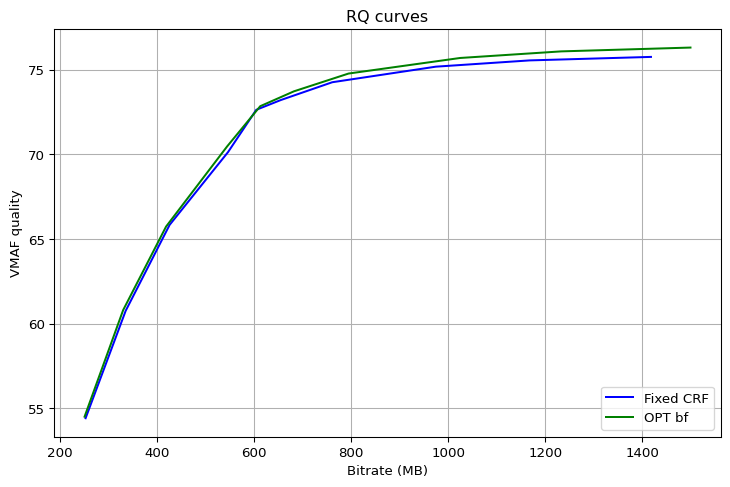

<Figure size 432x288 with 0 Axes>

In [11]:
import os
import subprocess
import json
import numpy as np
import matplotlib.pyplot as pl
import tkinter as tk #to import file
from tkinter import filedialog #to open import dialog

def print_info():
    !!ffprobe -v error -select_streams v:0 -show_entries format:stream -print_format json \
    test_vids/OPT_vids/bf-lg-10intvl/rush_fiel_rate500000bf_AVC.mp4
            
def get_bitrate(file):
    command = f"ffprobe -v error -select_streams v:0 -show_entries format:stream -print_format json {file}"
    cout = subprocess.run(command.split(), stdout=subprocess.PIPE, stderr=subprocess.STDOUT).stdout
    jout = json.loads(cout)  # Convert data from JSON string to dictionary
    return int(jout["format"]["bit_rate"])

def get_vmaf(dist,ref):
    c_vmaf = f"ffmpeg -i {ref} -i {dist} -hide_banner -loglevel error\
            -lavfi \"[0:v]setpts=PTS-STARTPTS[ref];\
                    [1:v]scale={res[0]}x{res[1]}:flags=bicubic,setpts=PTS-STARTPTS[dist];\
                    [dist][ref]libvmaf=feature=name=psnr:log_path=rd_results/vmaf_logs.json:log_fmt=json\" \
            -f null -" #|name=float_ssim|name=float_ms_ssim to compute the other metrics
    subprocess.call(c_vmaf, shell=True)
    print("-assessed= " + dist)
    with open("rd_results/vmaf_logs.json", 'r') as r: #extract quality and rate values
        i_data = json.load(r)
    return i_data["pooled_metrics"]["vmaf"]["mean"]

def encode(file,crf):
    lib = "libx264" #libx265, libvpx-vp9
    container = "mp4" #webm
    add_info = "" #-b:v 0
    out = "test_vids/temp_tests/" + str(crf) + "." + container
    
    enc = f"ffmpeg -i {file} -c:v {lib} -crf {crf} {add_info} {out} -hide_banner -loglevel error"
    subprocess.call(enc, shell=True)
    print("-encoded= " + out)
    return out
    
def scale():
    c_seq = "ffmpeg -i test_vids/srcRAW_FullHD/rush_field_cuts_1080p.y4m \
        -filter:v scale=480x270 test_vids/srcRAW_SD/rush_field_cuts_SDp.y4m"
    subprocess.call(c_seq, shell=True)
    
def get_comp_vals():
    with open(json_file, 'r') as r:
        i_data = json.load(r)
    
def open_file():
    root = tk.Tk()
    root.withdraw()
    f = os.path.relpath(filedialog.askopenfilename())
    #file_name = os.path.basename(source_path).split('.')[0]
    return f

#split an interval (l[0],l[1]) into n values
def interval(l,n):
    w = (l[1] - l[0]) / (n - 1)
    return np.array([round(l[0]+i*w) for i in range(n)])

res = [480,270]
f_ref = "test_vids/srcRAW_SD/rush_field_cuts_SDp.y4m"
#file = "test_vids/OPT_vids/bf-lg-10intvl/rush_fiel_vmaf75bf_AVC.mp4"
file = open_file()

[os.remove("test_vids/temp_tests/"+f) for f in os.listdir("test_vids/temp_tests/")]
my_dpi = 96
pl.figure(figsize=(860/my_dpi, 540/my_dpi), dpi=my_dpi)

rate = np.zeros(10)
dist = np.zeros(10)
for i,v in enumerate(interval([15,35],10)):
    o = encode(file, v)
    rate[i] = get_bitrate(o)
    dist[i] = get_vmaf(o,f_ref)
print(rate)
print(dist)
pl.plot(rate/1000, dist, '-b', label="Fixed CRF")

[os.remove("test_vids/temp_tests/"+f) for f in os.listdir("test_vids/temp_tests/")]
file = open_file()
for i,v in enumerate(interval([15,35],10)):
    o = encode(file, v)
    rate[i] = get_bitrate(o)
    dist[i] = get_vmaf(o,f_ref)
print(rate)
print(dist)
pl.plot(rate/1000, dist, '-g', label="OPT bf")

pl.grid(True)
pl.title("RQ curves")
pl.ylabel("VMAF quality")
pl.xlabel("Bitrate (MB)")
pl.legend(loc="lower right")
pl.figure()


In [ ]:
print(get_bitrate(file))
print(get_vmaf(file,f_ref))

In [ ]:
#!ffplay -f rawvideo -video_size 640x360 test_vids/downsampled/smithy_640.yuv

## math-array operations

In [ ]:
import numpy as np


## plots

In [ ]:
import matplotlib.pyplot as pl

In [ ]:
my_dpi = 96
pl.figure(figsize=(860/my_dpi, 540/my_dpi), dpi=my_dpi)
pl.plot(rate/1000, 100-dist, 'bo')
#pl.plot([start[0],end[0]],[start[1],end[1]])
pl.grid(True)
pl.title("RD shot 0 - points")
pl.ylabel("Distortion IVMAF")
pl.xlabel("MB Rate")
pl.figure()

[
